In [1]:
!pip install numpy==1.24.4

In [2]:
!pip install gensim

In [149]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import word2vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from google.colab import drive

In [151]:
file = "eswiki-large-vs100-w2-CBOW.model"
model = word2vec.Word2Vec.load(file)
model.save(file)

In [152]:
#Utilizamos 100 vectores de forma aleatoria
num_v = 100
vectors = model.wv.vectors.shape[0]
random_indices = np.random.choice(vectors,num_v,replace=False)
random_vectors = model.wv.vectors[random_indices]

In [172]:
def plot(new_vectors, original_indices, model):
    # Set the figure size
    fig, ax = plt.subplots(figsize=(15, 15))
    # Scatter plot the new vectors
    ax.scatter(new_vectors[:, 0], new_vectors[:, 1], s=3)
    # Get the vocabulary from the model
    vocabulary = model.wv.index_to_key
    # Extract words based on original indices
    words = [vocabulary[i] for i in original_indices]
    # Annotate the scatter plot with words
    for i, word in enumerate(words):
        ax.annotate(word, xy=(new_vectors[i, 0], new_vectors[i, 1]), fontsize=7)
    # Show the plot
    plt.show()

In [176]:
"""
t-Distributed Stochastic Neighbor Embedding
"""
tsne = TSNE(n_components=2)
tsne_vectors = tsne.fit_transform(random_vectors)
"""
Singular Value Decomposition
"""
svd = TruncatedSVD(n_components=2)
svd_vectors = svd.fit_transform(random_vectors)
"""
Principal Component Analysis
"""
pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(random_vectors)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


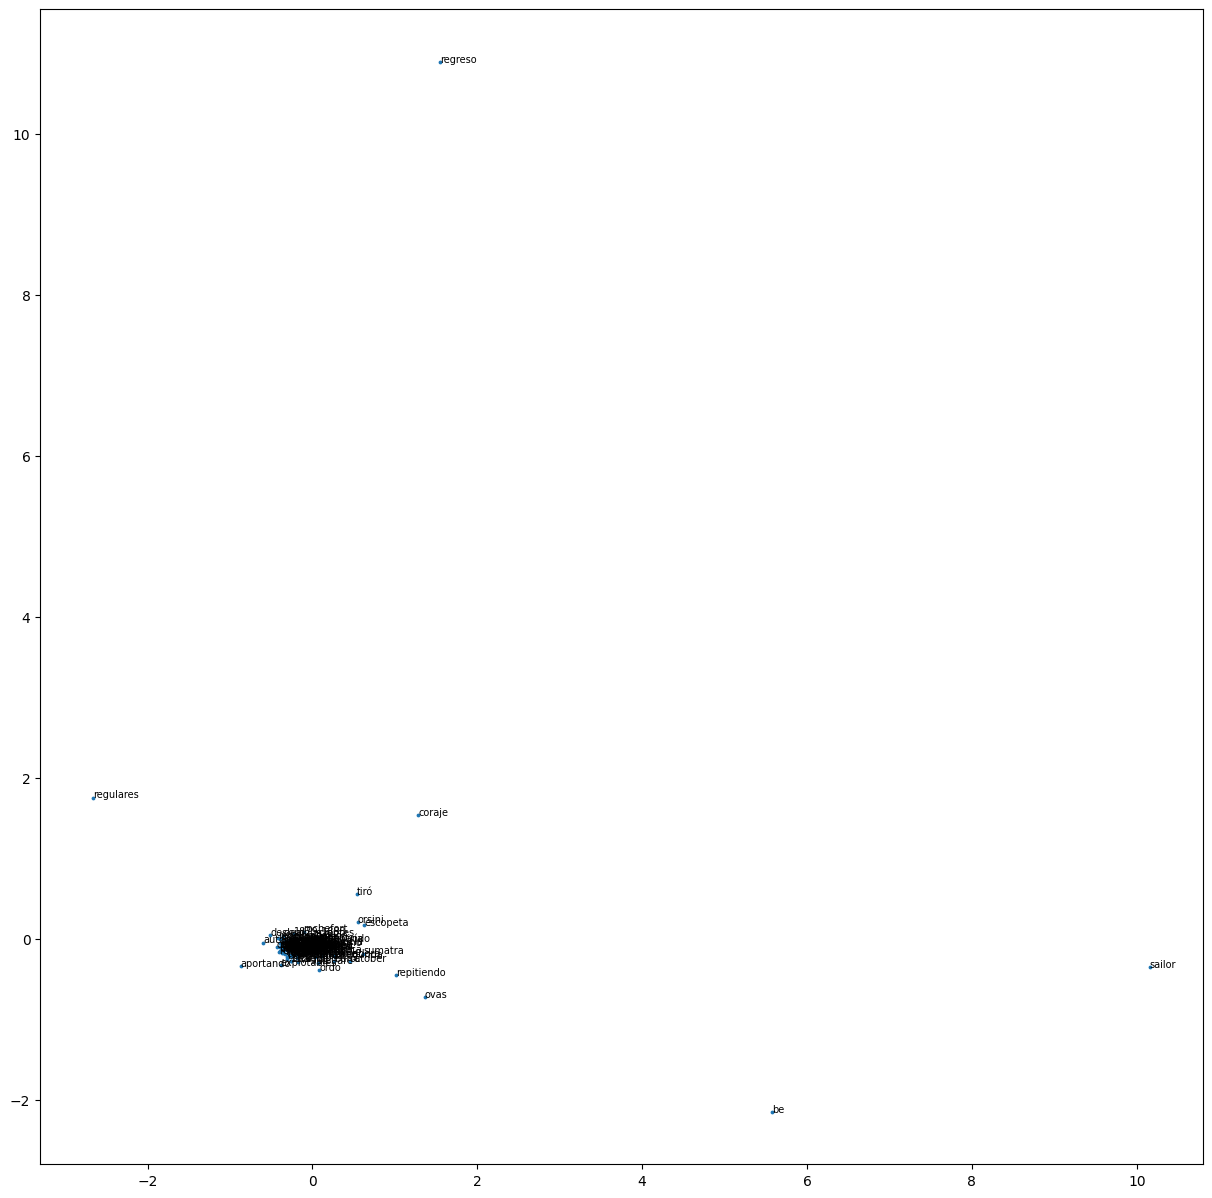

In [177]:
"""PLOTEO"""
plot(pca_vectors, random_indices, model)

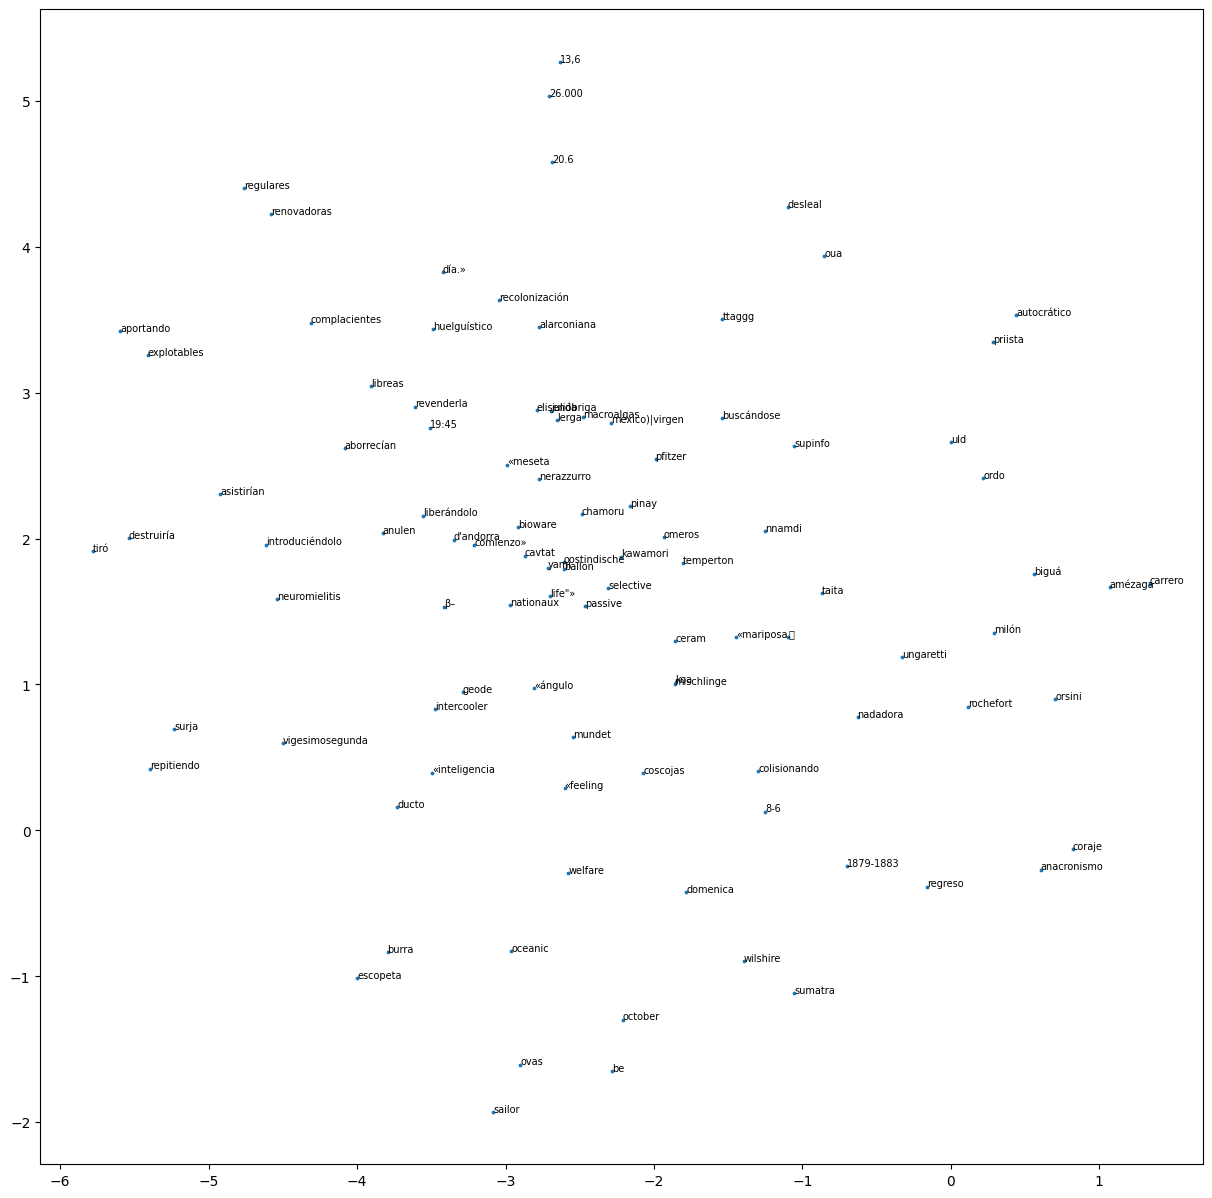

In [179]:
"""PLOTEO"""
plot(tsne_vectors, random_indices, model)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


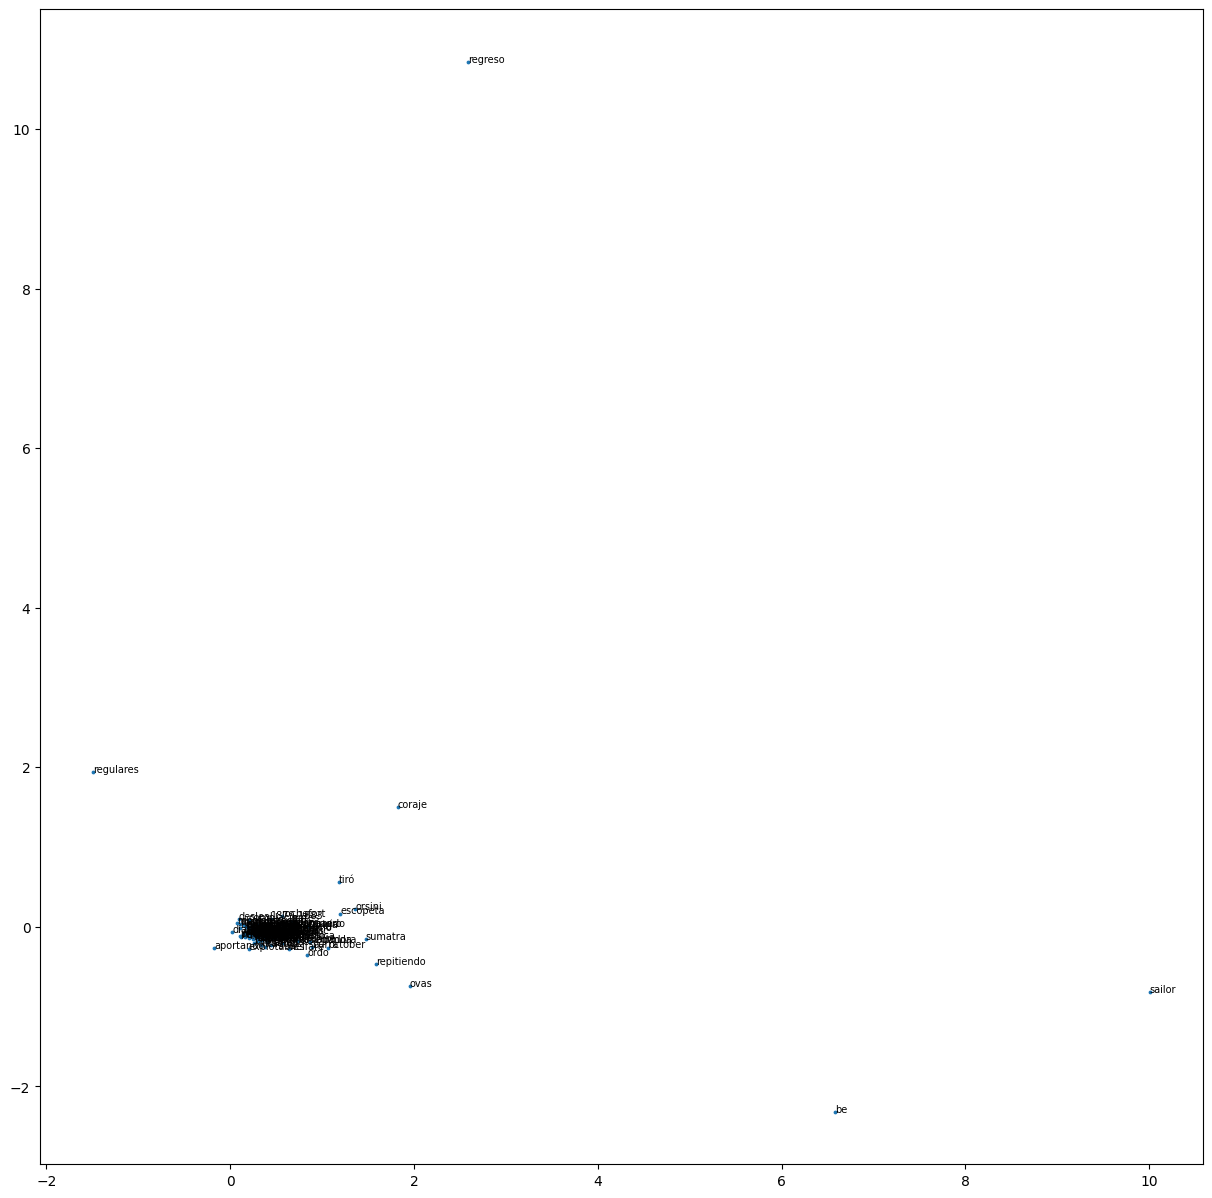

In [175]:
"""PLOTEO"""
plot(svd_vectors, random_indices, model)